<a href="https://colab.research.google.com/github/asifsarkeremon/CVPR/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
folder_path = '/content/drive/MyDrive/Colab Notebooks/resources/animal_dataset'

In [ ]:
import cv2
import numpy as np

images = []
labels = []

for label_folder in os.listdir(folder_path):
    class_path = os.path.join(folder_path, label_folder)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32))

        images.append(img)
        labels.append(label_folder)

print("Loaded images:", len(images))

images = np.array(images)
labels = np.array(labels)

# Flatten images: 32x32 -> 1024
X = images.reshape(len(images), -1)
y = labels

Loaded images: 300


In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9]
accuracy_l1 = []
accuracy_l2 = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    scores_l1 = []
    scores_l2 = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # L1 - Manhattan
        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l1.fit(X_train, y_train)
        scores_l1.append(knn_l1.score(X_test, y_test))

        # L2 - Euclidean
        knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_l2.fit(X_train, y_train)
        scores_l2.append(knn_l2.score(X_test, y_test))

    accuracy_l1.append(np.mean(scores_l1))
    accuracy_l2.append(np.mean(scores_l2))

print("K values:", k_values)
print("Average Accuracy (Manhattan L1):", accuracy_l1)
print("Average Accuracy (Euclidean L2):", accuracy_l2)

K values: [1, 3, 5, 7, 9]
Average Accuracy (Manhattan L1): [np.float64(0.37666666666666665), np.float64(0.4033333333333333), np.float64(0.37666666666666665), np.float64(0.42333333333333345), np.float64(0.42333333333333334)]
Average Accuracy (Euclidean L2): [np.float64(0.33999999999999997), np.float64(0.31999999999999995), np.float64(0.3566666666666667), np.float64(0.38), np.float64(0.35)]


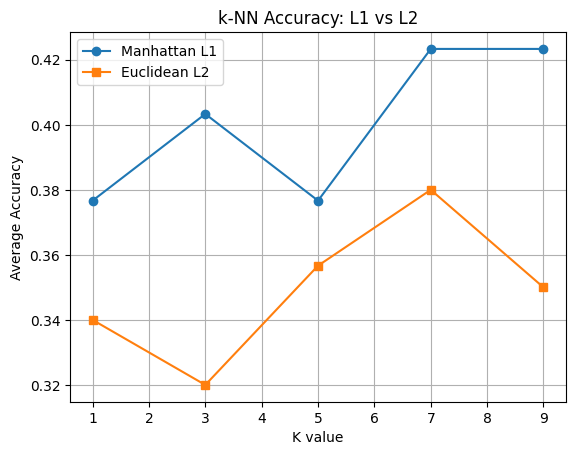

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracy_l1, marker='o', label='Manhattan L1')
plt.plot(k_values, accuracy_l2, marker='s', label='Euclidean L2')

plt.xlabel("K value")
plt.ylabel("Average Accuracy")
plt.title("k-NN Accuracy: L1 vs L2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
final_knn_l1 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
final_knn_l1.fit(X, y)

top_n1 = 5
num_images1 = 5

print("Top-5 Predictions (Manhattan L1):")
for i in range(num_images1):
    img_vector = X[i]

    distances, neighbors = final_knn_l1.kneighbors([img_vector], n_neighbors=top_n1)
    predictions = y[neighbors[0]]  # labels from full dataset

    print(f"Image {i} → {predictions}")


Top-5 Predictions (Manhattan L1):
Image 0 → ['cat' 'cat' 'dog' 'dog' 'dog']
Image 1 → ['cat' 'cat' 'dog' 'cat' 'cat']
Image 2 → ['cat' 'cat' 'dog' 'cat' 'dog']
Image 3 → ['cat' 'cat' 'cat' 'dog' 'panda']
Image 4 → ['cat' 'dog' 'cat' 'dog' 'dog']


In [ ]:
final_knn_l2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
final_knn_l2.fit(X, y)

top_n = 5
num_images = 5

print("\nTop-5 Predictions (Euclidean L2):")
for i in range(num_images):
    img_vector = X[i]

    distances, neighbors = final_knn_l2.kneighbors([img_vector], n_neighbors=top_n)
    predictions = y[neighbors[0]]  # labels from full dataset

    print(f"Image {i} → {predictions}")




Top-5 Predictions (Euclidean L2):
Image 0 → ['cat' 'dog' 'cat' 'dog' 'cat']
Image 1 → ['cat' 'cat' 'dog' 'cat' 'cat']
Image 2 → ['cat' 'cat' 'cat' 'dog' 'cat']
Image 3 → ['cat' 'cat' 'dog' 'cat' 'panda']
Image 4 → ['cat' 'dog' 'cat' 'dog' 'dog']
